In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

In [2]:
class XorModel(Model):
    def __init__(self):
        super(XorModel, self).__init__()
        self.fc1 = Dense(2, activation='sigmoid')
        self.fc2 = Dense(1, activation='sigmoid')
        
    def call(self,x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [3]:
xor_model = XorModel()
loss_object = tf.keras.losses.MeanSquaredError()
sgd = tf.keras.optimizers.SGD(lr=0.05, momentum=0.9)

In [4]:
@tf.function
def train_step(data,labels):
    with tf.GradientTape() as tape:
        predictions = xor_model(data)
        loss = loss_object(labels,predictions)
    gradients = tape.gradient(loss, xor_model.trainable_variables)
    sgd.apply_gradients(zip(gradients, xor_model.trainable_variables))

In [5]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])
batch_size = 1
train_ds = [[X[i*batch_size:(i+1)*batch_size,:],Y[i*batch_size:(i+1)*batch_size]] for i in range(4)]

In [6]:
EPOCHS = 1000

for epoch in range(EPOCHS):
    for data, labels in train_ds:
        train_step(data,labels)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



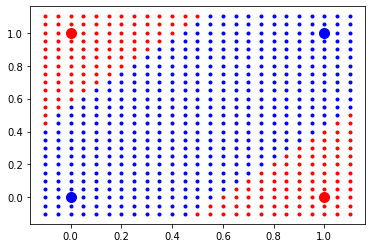

In [7]:
for i in np.arange(-0.1,1.1,0.05):
    for j in np.arange(-0.1,1.1,0.05):
        z = xor_model.call(np.array([[i,j]]))
        if z > 0.5:
            plt.plot(i,j,'.r')
        else:
            plt.plot(i,j,'.b')
            
for i in range(Y.size):
    if Y[i] ==1:
        fig = plt.plot(X[i,0],X[i,1],'ro')
    else:
        fig = plt.plot(X[i,0],X[i,1],'bo')
    plt.setp(fig, markersize = 10)